# Importing libraries
> Importing the MultinomialNB as it shows better results than other

> Also the 'pd.options.mode.chained_assignment = None' was included because when the text was manipulated it's throws a warning which is supposed to be overlooked

In [1]:
import re 
import string
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cleaning the text
1. Removing the html tags
2. Converting to lower case
3. Removing punctuations

In [2]:
raw_data = pd.read_csv('data/IMDB Dataset.csv')
df = raw_data.iloc[:10000, :]

def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),"",raw_text)
    return cleaned_text
df['review'] = df['review'].apply(remove_tags)
df['review'] = df['review'].apply(lambda x:x.lower())
exclude = string.punctuation
def remove_punctuation(text):
    for c in exclude:
        text = text.replace(c,'')
    return text
df['review'] = df['review'].apply(remove_punctuation)

# Adding shorthand for MultinomialNB and converting the strings to machine readable vectors

In [3]:
clf = MultinomialNB()
vectorizer = TfidfVectorizer(binary=True)#method to convert strings to vector
values = vectorizer.fit_transform(df['review'])
# Changing the positive/negative to simple 1/0 respectively
def sentiment_to_numeric(sentiment):
    return 1 if sentiment == 'positive' else 0  
labels = df['sentiment']
labels = labels.apply(sentiment_to_numeric)
# splitting the data as always
value_train, value_test, label_train, label_test = train_test_split(values, labels, test_size = 0.2, random_state = 7)
clf.fit(value_train.toarray(), label_train)

MultinomialNB()

# Reports

Accuracy: 86.3%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       999
           1       0.88      0.84      0.86      1001

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



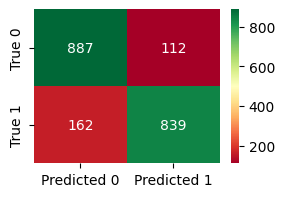

In [4]:
label_pred = clf.predict(value_test.toarray())
accuracy = accuracy_score(label_test, label_pred)
print(f'Accuracy: {accuracy*100}%')
print(classification_report(label_test, label_pred))
matrix = (confusion_matrix(label_test, label_pred))
new_matrix = pd.DataFrame(matrix, index = ['True 0', 'True 1',], columns= ['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(3, 2))
sns.heatmap(new_matrix, annot=True, fmt="d", cmap="RdYlGn")
plt.show()

### This section can be used to add your review and check the sentiment.
#### Only the straightforward positive or negative review are accurately shown
#### 0 for negative and 1 for positive

In [5]:
new_review = "I hate this movie, was not good at all"
review = vectorizer.transform([new_review]).toarray()
new_pred = clf.predict(review)
print(new_pred)

[0]
